<a href="https://colab.research.google.com/github/phaa/dio-baires-dev/blob/main/yolo_dataset_proprio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422 (from 1)
Receiving objects: 100% (422/422), 34.08 MiB | 40.39 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [3]:
cd OIDv4_ToolKit/

/content/OIDv4_ToolKit


In [ ]:
!pip3 install -r requirements.txt

In [5]:
!python3 main.py downloader --classes Beetle Insect --type_csv train --limit 500 --multiclasses 1


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Beetle', 'Insect'] together.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] y
...145%, 0 MB, 63487 KB/s, 0 seconds pas

In [6]:
!python3 main.py downloader --classes Beetle Insect --type_csv validation --limit 100 --multiclasses 1


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Beetle', 'Insect'] together.
   [ERROR] | Missing the validation-annotations-bbox.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] y
...100%, 16 MB, 38975 KB/s, 0 seconds p

# Convertendo os arquivos de anotação

In [7]:
!cat classes.txt

Apple
Orange
Light switch


In [8]:
!echo -e 'Beetle\nInsect' > classes.txt

In [ ]:
!git clone -n https://github.com/Hemilibeatriz/TreinamentoCustomizadoYOLO.git

In [10]:
cd TreinamentoCustomizadoYOLO/

/content/OIDv4_ToolKit/TreinamentoCustomizadoYOLO


In [11]:
!git checkout HEAD converter_anotacoes.py

Updated 1 path from 2c25c08


In [12]:
!mv converter_anotacoes.py /content/OIDv4_ToolKit/

In [14]:
cd ..

/content/OIDv4_ToolKit


In [15]:
!python converter_anotacoes.py

Subdiretorio atual: validation
Convertendo os annotations para a classe:  Beetle_Insect
100% 142/142 [00:01<00:00, 118.26it/s]
Subdiretorio atual: train
Convertendo os annotations para a classe:  Beetle_Insect
100% 1000/1000 [00:12<00:00, 82.26it/s]


# Montando pasta do drive

In [ ]:
from google.colab import drive
import os

# Montar o Google Drive
drive.mount('/content/drive')

# Definir os caminhos de origem e destino
drive_folder = '/content/drive/MyDrive/OIDv4_ToolKit'
colab_folder = '/content/OIDv4_ToolKit'

# Criar o link simbólico para montar a pasta
if os.path.exists(drive_folder):
    if os.path.islink(colab_folder) or os.path.exists(colab_folder):
        os.unlink(colab_folder)  # Remove links ou pastas existentes
    os.symlink(drive_folder, colab_folder)  # Cria o link simbólico
    print(f"Pasta do Google Drive montada em '{colab_folder}'.")
else:
    print(f"A pasta '{drive_folder}' não existe no Google Drive.")

# Instalar a biblioteca da Yolo v8

In [ ]:
!pip install ultralytics

In [17]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### Vamos criar o arquivo de configuração

In [21]:
with open('/content/OIDv4_ToolKit/dataset.yaml', 'w') as f:
    f.write("""
    train: /content/OIDv4_ToolKit/OID/Dataset/train/Beetle_Insect
    val: /content/OIDv4_ToolKit/OID/Dataset/validation/Beetle_Insect

    nc: 2
    names: ['Beetle', 'Insect']
    """)

# Treinando o modelo para detecção

In [22]:
model = YOLO('yolov8m.pt')  # Modelo base (n=Nano, s=Small, m=Medium, l=Large)
model.train(data='/content/OIDv4_ToolKit/dataset.yaml', epochs=50, imgsz=640, batch=16)

Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/OIDv4_ToolKit/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

100%|██████████| 755k/755k [00:00<00:00, 17.1MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 90.8MB/s]


AMP: checks passed ✅


train: Scanning /content/OIDv4_ToolKit/OID/Dataset/train/Beetle_Insect... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<00:00, 2197.95it/s]

train: New cache created: /content/OIDv4_ToolKit/OID/Dataset/train/Beetle_Insect.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/OIDv4_ToolKit/OID/Dataset/validation/Beetle_Insect... 142 images, 0 backgrounds, 0 corrupt: 100%|██████████| 142/142 [00:00<00:00, 2034.35it/s]


val: New cache created: /content/OIDv4_ToolKit/OID/Dataset/validation/Beetle_Insect.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.88G      1.423      2.281      1.635         67        640: 100%|██████████| 63/63 [00:36<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]

                   all        142        168     0.0815      0.626      0.107     0.0397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.85G      1.683      2.257       1.85         25        640: 100%|██████████| 63/63 [00:34<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]

                   all        142        168     0.0143      0.428     0.0105    0.00399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.82G      1.764      2.181      1.908         24        640: 100%|██████████| 63/63 [00:34<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]

                   all        142        168     0.0488      0.241     0.0239      0.006



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.73G      1.773      2.244      1.949         25        640: 100%|██████████| 63/63 [00:34<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.72it/s]

                   all        142        168     0.0308     0.0911    0.00744     0.0025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.87G      1.726      2.149      1.872         37        640: 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]


                   all        142        168      0.173      0.552      0.236     0.0912

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.83G      1.625      1.995      1.781         29        640: 100%|██████████| 63/63 [00:34<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]

                   all        142        168      0.126      0.233     0.0833     0.0335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.86G      1.596      1.943      1.779         34        640: 100%|██████████| 63/63 [00:34<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.70it/s]


                   all        142        168      0.318      0.518      0.328      0.154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.75G      1.581      1.915      1.755         34        640: 100%|██████████| 63/63 [00:34<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.11it/s]

                   all        142        168      0.302      0.622       0.38      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.81G      1.591      1.919       1.76         30        640: 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.15it/s]

                   all        142        168      0.343      0.706      0.337      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.82G      1.527      1.781      1.698         34        640: 100%|██████████| 63/63 [00:34<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.75it/s]

                   all        142        168       0.27      0.649      0.345      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.83G      1.509      1.781      1.698         35        640: 100%|██████████| 63/63 [00:35<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]

                   all        142        168      0.283      0.618      0.348      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.79G      1.487      1.722      1.686         37        640: 100%|██████████| 63/63 [00:34<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.93it/s]

                   all        142        168      0.365      0.688      0.452      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.83G      1.438      1.641      1.661         29        640: 100%|██████████| 63/63 [00:34<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.56it/s]

                   all        142        168      0.303       0.66      0.346       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.85G      1.465      1.681       1.66         29        640: 100%|██████████| 63/63 [00:35<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.68it/s]

                   all        142        168      0.364      0.745      0.471      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.82G      1.389       1.63      1.598         29        640: 100%|██████████| 63/63 [00:35<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        142        168      0.332      0.672      0.426      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.73G      1.392      1.575      1.581         24        640: 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]

                   all        142        168      0.391      0.694      0.419      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.83G      1.386      1.614      1.597         24        640: 100%|██████████| 63/63 [00:35<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]

                   all        142        168       0.41      0.693      0.489      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.86G      1.387      1.576      1.588         26        640: 100%|██████████| 63/63 [00:34<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        142        168      0.438      0.601      0.507      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.88G      1.347      1.573      1.557         35        640: 100%|██████████| 63/63 [00:34<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.65it/s]

                   all        142        168      0.432      0.616       0.49      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.76G      1.333      1.531      1.563         21        640: 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.50it/s]

                   all        142        168      0.365      0.697      0.491      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.85G      1.337      1.526      1.563         48        640: 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.67it/s]

                   all        142        168      0.434      0.725      0.549      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.85G      1.311      1.462      1.552         37        640: 100%|██████████| 63/63 [00:35<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        142        168      0.539      0.657       0.62      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.94G      1.322        1.5      1.529         19        640: 100%|██████████| 63/63 [00:34<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]

                   all        142        168      0.493      0.692      0.566      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.74G      1.289      1.411      1.515         27        640: 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.70it/s]

                   all        142        168      0.485      0.746      0.616      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.82G      1.301      1.424       1.53         22        640: 100%|██████████| 63/63 [00:34<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.69it/s]

                   all        142        168      0.542      0.678      0.619      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.83G      1.286      1.402       1.52         38        640: 100%|██████████| 63/63 [00:35<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        142        168      0.492      0.755      0.607      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.85G      1.228      1.368      1.471         25        640: 100%|██████████| 63/63 [00:35<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        142        168       0.59       0.71      0.659      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.72G      1.257      1.348        1.5         24        640: 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]

                   all        142        168      0.529      0.692      0.623      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.82G      1.265      1.357      1.482         21        640: 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        142        168      0.554      0.661      0.616      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.87G      1.233      1.327      1.469         28        640: 100%|██████████| 63/63 [00:35<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]

                   all        142        168      0.573      0.701      0.641      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.89G      1.213      1.319      1.474         19        640: 100%|██████████| 63/63 [00:35<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]

                   all        142        168      0.648      0.733      0.713      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.74G      1.208      1.254      1.448         30        640: 100%|██████████| 63/63 [00:34<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.09it/s]

                   all        142        168      0.502      0.695      0.637      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.85G      1.175      1.229      1.425         36        640: 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]

                   all        142        168      0.534       0.74      0.693      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.87G      1.196      1.212      1.433         22        640: 100%|██████████| 63/63 [00:34<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]

                   all        142        168      0.583      0.683      0.649      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.85G      1.162      1.223      1.409         35        640: 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.68it/s]

                   all        142        168      0.549      0.676      0.624      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.73G      1.146      1.206      1.422         21        640: 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.65it/s]

                   all        142        168        0.7      0.706      0.739      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.83G      1.164      1.197      1.432         24        640: 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.75it/s]

                   all        142        168      0.648      0.719       0.75      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.82G      1.143       1.17      1.403         35        640: 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]

                   all        142        168      0.722      0.652      0.725      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.92G       1.13      1.112      1.387         30        640: 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.74it/s]

                   all        142        168      0.703      0.708      0.727      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.75G      1.073      1.096      1.364         44        640: 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.74it/s]

                   all        142        168      0.658      0.716      0.747      0.472


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.82G      1.029      1.023      1.359         15        640: 100%|██████████| 63/63 [00:36<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]

                   all        142        168      0.622      0.682      0.687      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.86G      1.032     0.9732      1.395          8        640: 100%|██████████| 63/63 [00:34<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]

                   all        142        168      0.676      0.725      0.741      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.83G     0.9955     0.9675      1.377         21        640: 100%|██████████| 63/63 [00:34<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]

                   all        142        168      0.677       0.67       0.73      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.73G      1.009     0.9183      1.379         18        640: 100%|██████████| 63/63 [00:35<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]

                   all        142        168      0.847      0.665      0.795      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.64G     0.9841      0.881      1.362          8        640: 100%|██████████| 63/63 [00:35<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.75it/s]


                   all        142        168      0.772      0.726      0.786       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.84G     0.9678     0.8761       1.34          8        640: 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]

                   all        142        168      0.716      0.696      0.774      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.85G     0.9512     0.8305      1.313          9        640: 100%|██████████| 63/63 [00:34<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]

                   all        142        168      0.699      0.712      0.765      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.77G      0.934     0.8289      1.328          8        640: 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.68it/s]


                   all        142        168      0.689      0.788      0.796      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.82G     0.9271     0.8109       1.29         10        640: 100%|██████████| 63/63 [00:34<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]


                   all        142        168      0.713      0.746      0.799      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.83G     0.9132      0.766      1.295         15        640: 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]


                   all        142        168      0.708      0.759      0.799      0.527

50 epochs completed in 0.593 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 52.0MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]


                   all        142        168      0.689       0.79      0.796      0.539
                Beetle         42         47      0.615      0.915      0.834      0.597
                Insect        101        121      0.763      0.664      0.758      0.481
Speed: 0.2ms preprocess, 8.8ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x788022383290>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

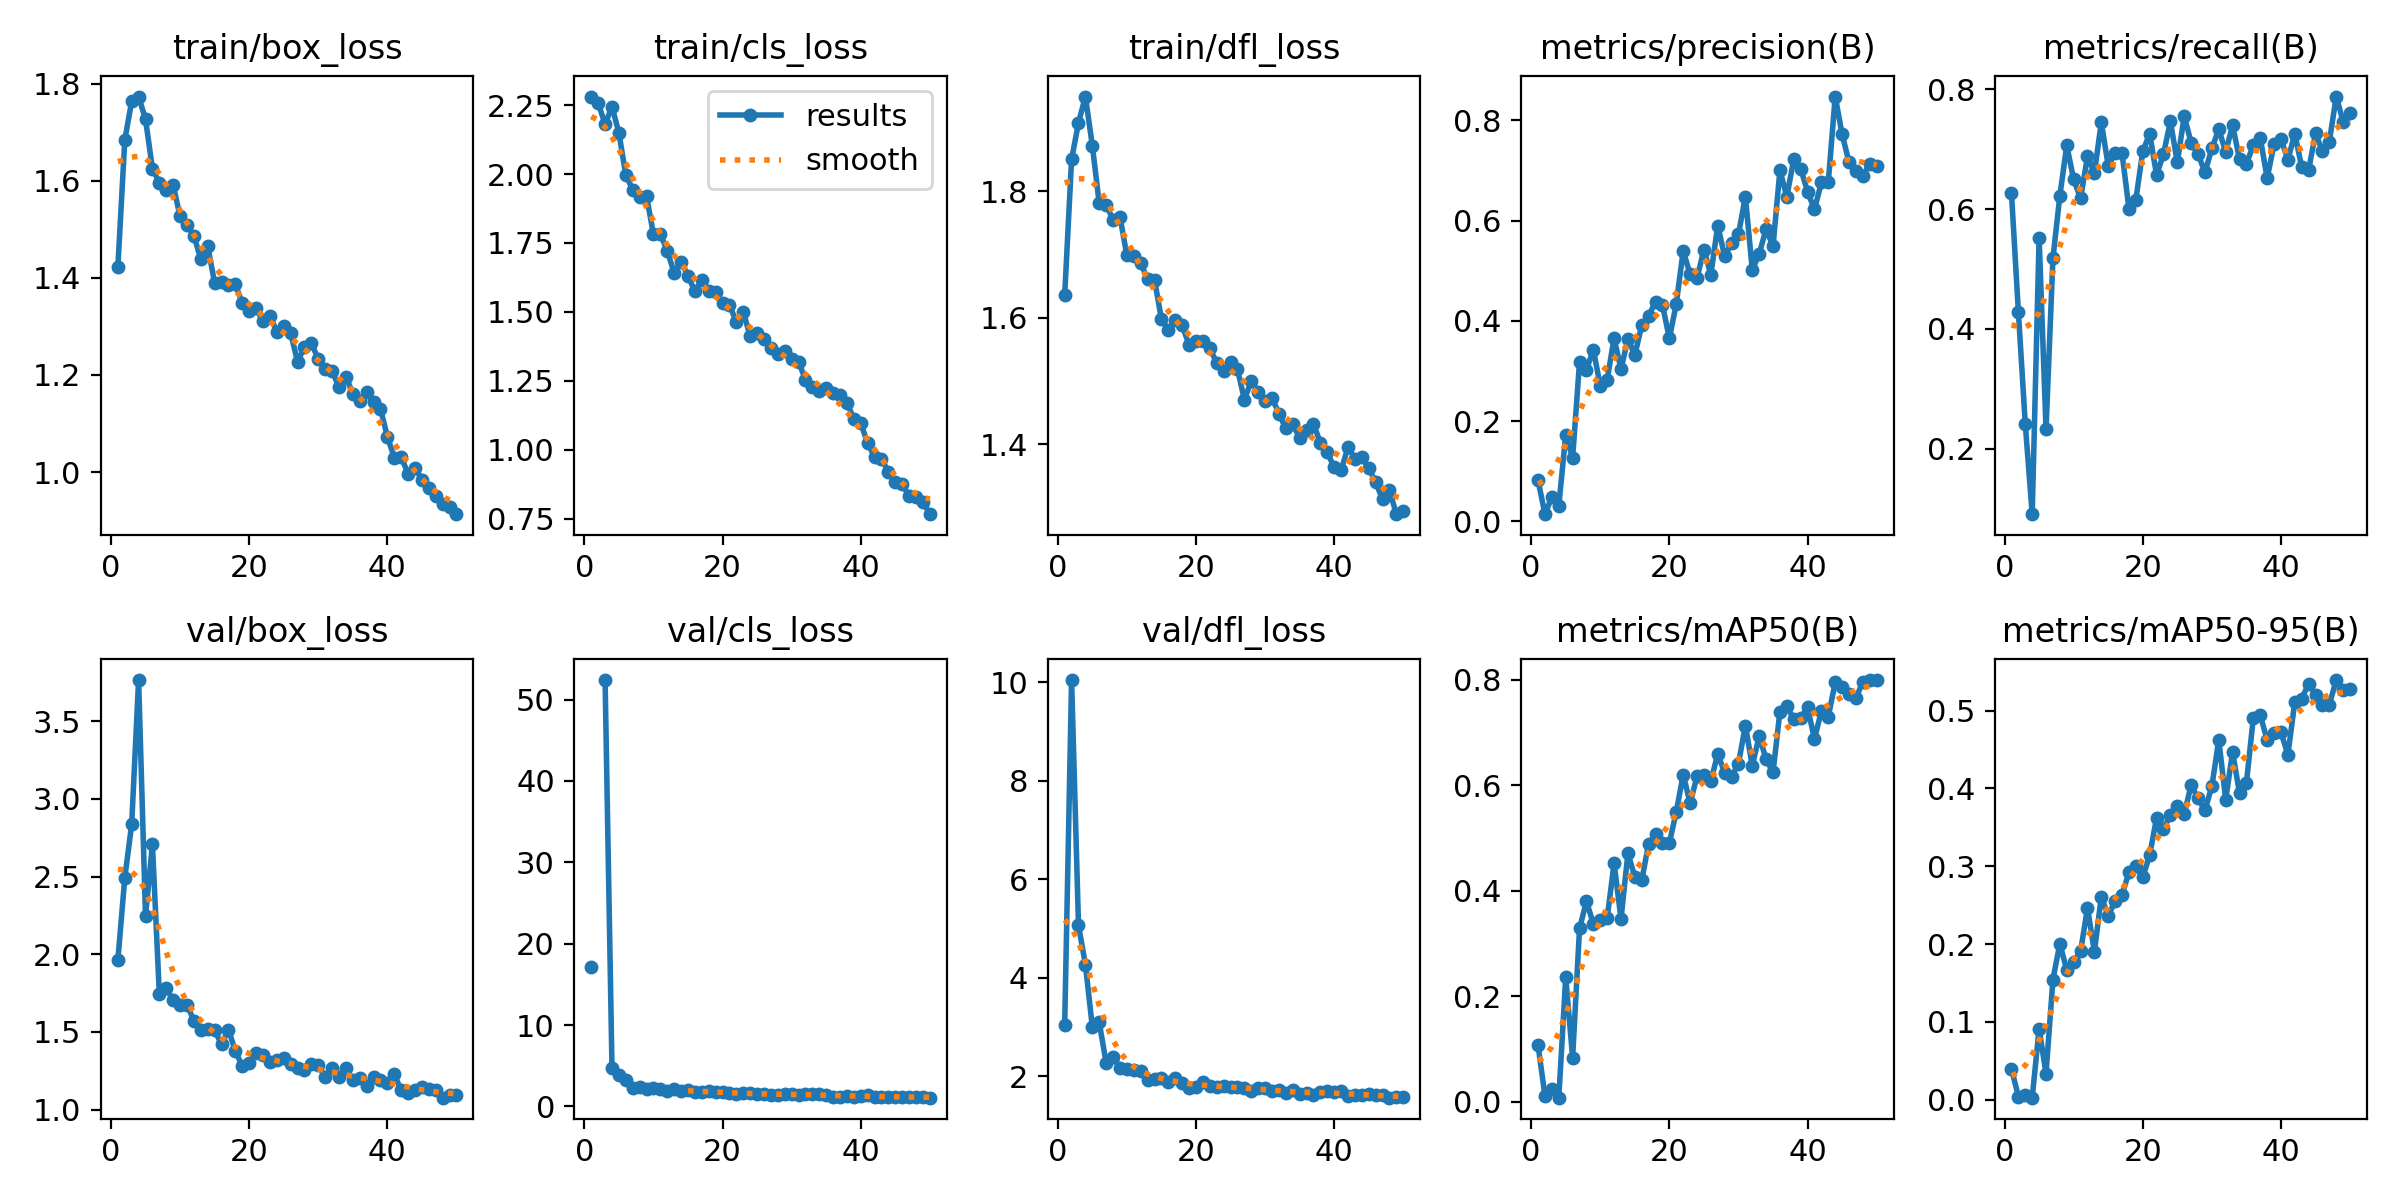

In [24]:
from IPython.display import Image, display

# Exibe os gráficos de treinamento (loss, métricas, etc.)
display(Image('/content/OIDv4_ToolKit/runs/detect/train2/results.png'))

In [27]:
# Carregar o modelo treinado
model = YOLO('/content/OIDv4_ToolKit/runs/detect/train2/weights/best.pt')

# Fazer inferência
results = model.predict(source='/content/OIDv4_ToolKit/OID/Dataset/validation/Beetle_Insect', save=True, imgsz=640)


image 1/142 /content/OIDv4_ToolKit/OID/Dataset/validation/Beetle_Insect/002aab1d644cae0e.jpg: 640x480 2 Insects, 47.7ms
image 2/142 /content/OIDv4_ToolKit/OID/Dataset/validation/Beetle_Insect/00455ae2731e1046.jpg: 480x640 2 Insects, 42.4ms
image 3/142 /content/OIDv4_ToolKit/OID/Dataset/validation/Beetle_Insect/0128080be1b488d7.jpg: 448x640 1 Beetle, 45.5ms
image 4/142 /content/OIDv4_ToolKit/OID/Dataset/validation/Beetle_Insect/050a2dbc5e91bb68.jpg: 640x640 3 Insects, 38.9ms
image 5/142 /content/OIDv4_ToolKit/OID/Dataset/validation/Beetle_Insect/06ed6ffed2ab0f35.jpg: 416x640 1 Insect, 45.4ms
image 6/142 /content/OIDv4_ToolKit/OID/Dataset/validation/Beetle_Insect/0a25fd986539e54d.jpg: 544x640 1 Beetle, 46.3ms
image 7/142 /content/OIDv4_ToolKit/OID/Dataset/validation/Beetle_Insect/0bb760fdab7cd583.jpg: 448x640 1 Beetle, 24.4ms
image 8/142 /content/OIDv4_ToolKit/OID/Dataset/validation/Beetle_Insect/0efea50f0453a640.jpg: 640x512 1 Beetle, 44.4ms
image 9/142 /content/OIDv4_ToolKit/OID/Datas

In [32]:
from google.colab import drive
import shutil
import os

# Montar o Google Drive
drive.mount('/content/drive')

# Definir os caminhos de origem e destino
source_path = '/content/OIDv4_ToolKit'
destination_path = '/content/drive/MyDrive/OIDv4_ToolKit'

# Verificar se a pasta de origem existe
if os.path.exists(source_path):
    # Verificar se o destino já existe para evitar erros
    if os.path.exists(destination_path):
        shutil.rmtree(destination_path)  # Remove o destino existente
    shutil.copytree(source_path, destination_path)  # Copia a pasta
    print(f"Pasta '{source_path}' foi copiada para '{destination_path}'.")
else:
    print(f"A pasta '{source_path}' não existe.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Pasta '/content/OIDv4_ToolKit' foi copiada para '/content/drive/MyDrive/OIDv4_ToolKit'.
